# IMPORTING REQUIRED PYTHON LIBRARIES

In [1]:
import matplotlib
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import cv2

In [2]:
from PIL import Image as pil_image
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# DATA EXPLORATION
## 1. VISUALIZATIONS

### Plotting numpy arrays as images

In [3]:
import seaborn_image as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/caries/wc65.jpg")
print(img)

[[[74 62 36]
  [74 62 36]
  [74 62 36]
  ...
  [51 55 58]
  [50 54 57]
  [50 54 57]]

 [[71 59 33]
  [71 59 33]
  [71 59 33]
  ...
  [51 55 58]
  [50 54 57]
  [50 54 57]]

 [[70 58 32]
  [70 58 32]
  [70 58 32]
  ...
  [50 54 57]
  [50 54 57]
  [50 54 57]]

 ...

 [[67 65 66]
  [67 65 66]
  [67 65 66]
  ...
  [40 40 40]
  [38 38 38]
  [38 38 38]]

 [[67 67 69]
  [67 67 69]
  [66 66 68]
  ...
  [41 41 41]
  [38 38 38]
  [38 38 38]]

 [[67 67 69]
  [67 67 69]
  [66 66 68]
  ...
  [42 42 42]
  [41 41 41]
  [41 41 41]]]


### Some basic descriptive statistics about our image data

No. of Obs. : 265644
Min. Value : 4
Max. Value : 255
Mean : 104.51206501934921
Variance : 1439.603709985255
Skewness : -0.3342985886136318


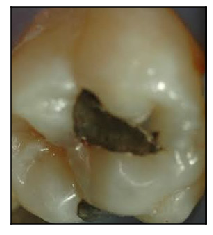

In [4]:
ax = sns.imgplot(
    img,
    describe = True,  # default is False
)

### Applying pseudocolor schemes to image plots

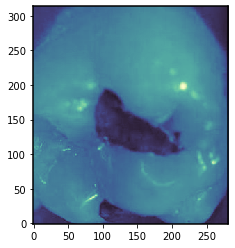

In [5]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)

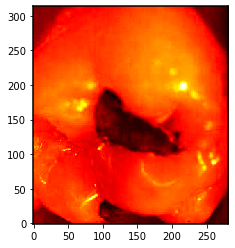

In [6]:
# With a luminosity (2D, no color) image
plt.imshow(lum_img, cmap = "hot")

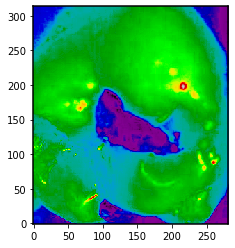

In [7]:
imgplot = plt.imshow(lum_img)
imgplot.set_cmap('nipy_spectral') # Changing colormaps on existing plot objects

### Color scale reference

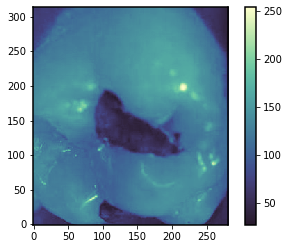

In [8]:
imgplot = plt.imshow(lum_img)
plt.colorbar()

### Examining a specific data range

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        7.000e+00, 4.000e+00, 1.300e+01, 2.200e+01, 3.600e+01, 5.600e+01,
        9.600e+01, 1.190e+02, 2.150e+02, 2.350e+02, 2.820e+02, 3.330e+02,
        0.000e+00, 3.350e+02, 3.170e+02, 3.360e+02, 3.100e+02, 3.060e+02,
        2.920e+02, 3.360e+02, 3.860e+02, 5.030e+02, 3.450e+02, 4.630e+02,
        4.350e+02, 3.920e+02, 3.430e+02, 3.520e+02, 2.930e+02, 2.980e+02,
        3.910e+02, 2.980e+02, 3.130e+02, 2.610e+02, 2.440e+02, 2.440e+02,
        1.970e+02, 2.200e+02, 2.380e+02, 2.260e+02, 2.550e+02, 3.000e+02,
        3.720e+02, 3.260e+02, 3.210e+02, 2.550e+02, 2.440e+02, 1.860e+02,
        1.590e+02, 1.200e+02, 1.560e+0

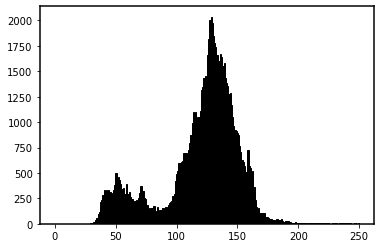

In [9]:
plt.hist(lum_img.ravel(), bins=256, range=(0.0, 250.0), fc='k', ec='k')

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t46ac055075ed48529f97473a88ff7945">
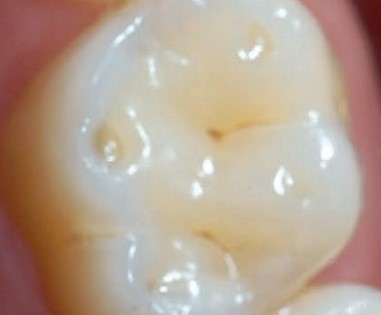

In [10]:
import PIL.Image
import toyplot

image = PIL.Image.open("D:\Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/without_caries/nc41.jpg")
canvas, mark = toyplot.image(image, width=300)

(-0.5, 116.5, -0.5, 115.5)

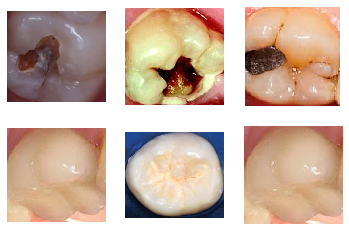

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/caries/wc15.jpg")
img2 = mpimg.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/caries/wc30.jpg")
img3 = mpimg.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/caries/wc63.jpg")
img4 = mpimg.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/without_caries/nc15.jpg")
img5 = mpimg.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/without_caries/nc30.jpg")
img6 = mpimg.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/without_caries/nc36.jpg")
fig = plt.figure()
ax = fig.add_subplot(2, 3, 1)
imgplot = plt.imshow(img1)
plt.axis('off')
ax = fig.add_subplot(2, 3, 2)
imgplot = plt.imshow(img2)
plt.axis('off')
ax = fig.add_subplot(2, 3, 3)
imgplot = plt.imshow(img3)
plt.axis('off')
ax = fig.add_subplot(2, 3, 4)
imgplot = plt.imshow(img4)
plt.axis('off')
ax = fig.add_subplot(2, 3, 5)
imgplot = plt.imshow(img5)
plt.axis('off')
ax = fig.add_subplot(2, 3, 6)
imgplot = plt.imshow(img6)
plt.axis('off')

### Converts the data to a single channel containing floating-point grayscale color

In [12]:
import skimage.color
gray = skimage.color.rgb2gray(img)
gray.shape, gray.dtype

((314, 282), dtype('float64'))

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te4592d392e2b45b5bea0210b1e577b1b">
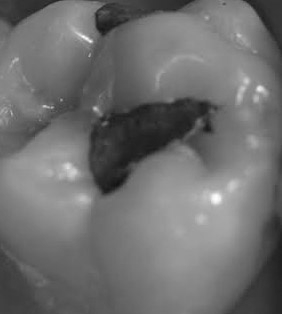

In [13]:
canvas, mark = toyplot.image(gray, width=300)

### Displaying one-bit image

In [14]:
import skimage.filters
binary = gray > skimage.filters.threshold_isodata(gray)
binary.shape, binary.dtype

((314, 282), dtype('bool'))

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t48af84631c004800bd025cae59d16d06">
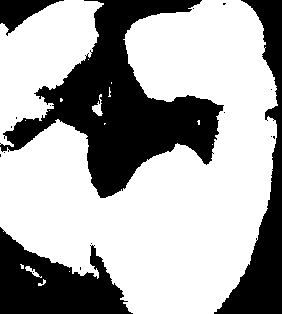

In [15]:
canvas, mark = toyplot.image(binary, width=300)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="300.0px" viewBox="0 0 300.0 300.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t3d8d0f232c374841bebd9c8a7829ed55">
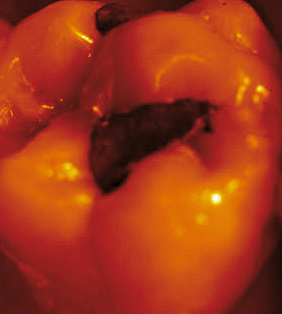

In [16]:
# Grayscale data can also be mapped using Toyplot’s usual Color Mapping functionality
colormap = toyplot.color.linear.map("Blackbody")
canvas, mark = toyplot.image((gray, colormap), width=300)

## 2. Image Data Augmentation techniques

In [42]:
import cv2
image = cv2.imread("D:/Sanyam B.Tech/SANYAM FIFTH SEM/FDA/Project/Dataset/teeth_dataset/Trianing/caries/wc68.jpg")

def show(image):
    window_name = 'image'
    # Displaying the image 
    cv2.imshow(window_name, image)
    # waits for user to press any key (this is necessary to avoid Python kernel form crashing)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

show(image)

### Checking the Data Structure

In [18]:
print(image.shape)
print(image.size)
print(type(image))

(143, 166, 3)
71214
<class 'numpy.ndarray'>


### Converting the image color space BGR to GRAY

In [43]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show(gray)

### Converting the image color space BGR to RGB

In [45]:
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
show(rgb)

### Image Translation

In [22]:
num_rows, num_cols = image.shape[:2]
translation_matrix = np.float32([ [1,0,55], [0,1,25] ])
img_translation = cv2.warpAffine(image, translation_matrix, (num_cols, num_rows), cv2.INTER_LINEAR)
show(img_translation)

In [47]:
translation_matrix = np.float32([ [1,0,-10], [0,1,-30] ])
img_translation = cv2.warpAffine(img_translation, translation_matrix, (num_cols + 70 + 30, num_rows + 110 + 50))
show(img_translation)

### Image Rotation

In [51]:
img_rotation = cv2.warpAffine(image, cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 0.6), (num_cols, num_rows))
show(img_rotation)

### Image Scaling

In [52]:
# Shrinking the image
img_shrinked = cv2.resize(image,(90, 90), interpolation = cv2.INTER_AREA)
show(img_shrinked)

In [53]:
# Enlarge the image size
img_enlarged = cv2.resize(img_shrinked,None,fx=1.5, fy=1.5, interpolation = cv2.INTER_CUBIC)
show(img_enlarged)

## 3. Image Transformation

### Affine transformation

In [27]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[0,0], [int(0.6*(num_cols-1)),0], [int(0.4*(num_cols-1)),num_rows-1]])
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))
show(image)

In [28]:
show(img_afftran)

In [29]:
# Mirror image
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
dst_points = np.float32([[num_cols-1,0], [0,0], [num_cols-1,num_rows-1]])
matrix = cv2.getAffineTransform(src_points, dst_points)
img_afftran = cv2.warpAffine(image, matrix, (num_cols,num_rows))
show(img_afftran)

### Projective Transformation

In [30]:
src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1], [num_cols-1,num_rows-1]])
dst_points = np.float32([[0,0], [num_cols-1,0], [int(0.33*num_cols),num_rows-1], [int(0.66*num_cols),num_rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_protran = cv2.warpPerspective(image, projective_matrix, (num_cols,num_rows))
show(img_protran)

### Image Wrapping

In [31]:
import math
rows, cols = image.shape[:2]

# Vertical wave 

img_output = np.zeros(img_afftran.shape, dtype=image.dtype) 
for i in range(rows): 
    for j in range(cols): 
        offset_x = int(25.0 * math.sin(2 * 3.14 * i / 180)) 
        offset_y = 0
        if j+offset_x < rows: 
            img_output[i,j] = img_afftran[i,(j+offset_x)%cols] 
        else: 
            img_output[i,j] = 0
show(img_output)

# PREPROCESSING

In [32]:
def preprocessing_images():
    image_gen = ImageDataGenerator(rotation_range = 30, # Int. Degree range for random rotations.
                                    width_shift_range = 0.1, # float: fraction of total width, if < 1, or pixels if >= 1
                                    height_shift_range = 0.1, # float: fraction of total height, if < 1, or pixels if >= 1
                                    rescale = 1/255, # rescaling factor
                                    shear_range = 0.2, # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
                                    zoom_range = 0.2, # Range for random zoom. If a float, [lower, upper] = [1-zoom_range, 1+zoom_range]
                                    horizontal_flip = True, # Randomly flip inputs horizontally
                                    fill_mode = 'nearest' # Points outside the boundaries of the input are filled according to the given mode 'nearest'
                                  )
    return image_gen

image_gen = preprocessing_images() # It generate batches of tensor image data with real-time data augmentation.

def image_shaping():
    image_shape = (150, 150, 3)
    return image_shape

image_shape = image_shaping() # 150 x 150 RGB pictures

# image_gen
# image_shape

# MODEL BUILDING

In [33]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [34]:
model = Sequential()
def f_model(model):
    model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu',)) # 32 filters or convolutions of size 3 X 3, with relu as 
                                                                                                           # activation function. 
    model.add(MaxPooling2D(pool_size = (2, 2))) # method for Max-pooling layer 
                                                # default size of matrix is 2 X 2
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu',)) # 64 filters or convolutions of size 3 X 3, with relu as
                                                                                                           # activation function. 
    model.add(MaxPooling2D(pool_size = (2, 2))) # method for Max-pooling layer 
                                                # default size of matrix is 2 X 2
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu',)) # 64 filters or convolutions of size 3 X 3, with relu as
                                                                                                           # activation function.
    model.add(MaxPooling2D(pool_size = (2, 2))) # method for Max-pooling layer 
                                                # default size of matrix is 2 X 2
    model.add(Flatten()) # used to flatten the input
    model.add(Dense(128)) # 128 is the dimensionality of the output space
    model.add(Activation('relu')) # Applies the rectified linear unit activation function
    model.add(Dropout(0.5)) # rate = 0.5(should be float between 0 and 1); rate: Fraction of the input units to drop
    model.add(Dense(1)) # 1 is the dimensionality of the output space
    model.add(Activation('sigmoid')) # Applies the sigmoid activation function
f_model(model)


### CONFIGURING THE MODEL FOR TRAINING

In [35]:
def configure_model():
    model.compile(loss = 'binary_crossentropy', # Loss function
                    optimizer = 'Adam', # optimizer: String (name of optimizer) or optimizer instance
                    metrics = ['accuracy'] # List of metrics to be evaluated by the model during training and testing
                 )
configure_model() # Configures the model for training

### MODEL SUMMARY

In [36]:
def f_model_summary():
    model.summary()

f_model_summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

# TRAINING THE DATASET

### GENERATING BATCHES OF AUGMENTED DATA

In [38]:
def generating_batches_of_augmented_data():
    batch_size = 5
    train_image_gen = image_gen.flow_from_directory('D:\\Sanyam B.Tech\\SANYAM FIFTH SEM\\FDA\\Project\\Dataset\\teeth_dataset\\Trianing',
                                                    target_size = image_shape[:2],
                                                    batch_size = batch_size,
                                                    class_mode = 'binary')
    return train_image_gen

train_image_gen = generating_batches_of_augmented_data()

Found 100 images belonging to 2 classes.


In [40]:
def generating_batches_of_augmented_test_data():
    batch_size = 5
    test_image_gen = image_gen.flow_from_directory('D:\\Sanyam B.Tech\\SANYAM FIFTH SEM\\FDA\\Project\\Dataset\\teeth_dataset\\test',
                                                    target_size = image_shape[:2],
                                                    batch_size = batch_size,
                                                    class_mode = 'binary')
    return test_image_gen

test_image_gen = generating_batches_of_augmented_test_data()

Found 25 images belonging to 2 classes.


In [41]:
train_image_gen.class_indices

{'caries': 0, 'without_caries': 1}

### TRAIN THE TRAINING DATASET INTO THE MODEL

In [15]:
import warnings
def train_data():
    warnings.filterwarnings('ignore')
    results = model.fit_generator(train_image_gen,
                                    epochs = 50,
                                    steps_per_epoch = len(train_image_gen),
                                    validation_data = test_image_gen,
                                    validation_steps = len(test_image_gen))
    return results

results = train_data()

Epoch 1/50
20/20 [==============================] - 2s 113ms/step - loss: 0.2631 - accuracy: 0.8700 - val_loss: 0.1532 - val_accuracy: 1.0000
Epoch 2/50
20/20 [==============================] - 3s 134ms/step - loss: 0.2058 - accuracy: 0.9400 - val_loss: 0.3191 - val_accuracy: 0.9200
Epoch 3/50
20/20 [==============================] - 3s 133ms/step - loss: 0.2508 - accuracy: 0.8900 - val_loss: 0.1310 - val_accuracy: 0.9600
Epoch 4/50
20/20 [==============================] - 3s 139ms/step - loss: 0.2468 - accuracy: 0.8800 - val_loss: 0.1406 - val_accuracy: 1.0000
Epoch 5/50
20/20 [==============================] - 2s 122ms/step - loss: 0.2876 - accuracy: 0.8600 - val_loss: 0.1763 - val_accuracy: 0.9600
Epoch 6/50
20/20 [==============================] - 2s 115ms/step - loss: 0.3376 - accuracy: 0.8900 - val_loss: 0.1397 - val_accuracy: 1.0000
Epoch 7/50
20/20 [==============================] - 2s 118ms/step - loss: 0.2575 - accuracy: 0.9000 - val_loss: 0.1576 - val_accuracy: 1.0000
Epoch 

# PERFORMANCE METRICES

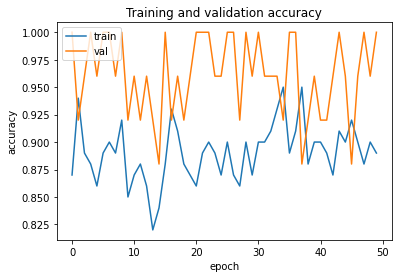

In [16]:
import keras
from matplotlib import pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

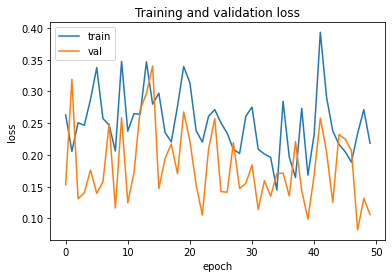

In [17]:
import keras
from matplotlib import pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Training and validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 96ms/step
1
Healthy tooth


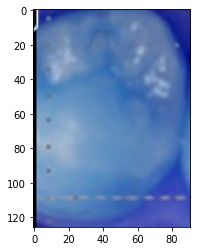

In [18]:
from keras.preprocessing import image
import numpy as np
def get_res(path):
    raw_img = tf.keras.utils.load_img(path, target_size = (150, 150))
    raw_img = tf.keras.preprocessing.image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    predict_range = 0.3
    raw_img = raw_img / 255
    predict = model.predict(raw_img)
    # print(predict)
    if(predict > predict_range):
        prediction = 1
    else:
        prediction = 0
    print(f'{prediction}')
    plt.imshow(cv2.imread(path))
    if prediction:
        print("Healthy tooth")
    else:
        print("cavity infected tooth")
    plt.show()
path = "D:\\Sanyam B.Tech\\SANYAM FIFTH SEM\\FDA\\Project\\Dataset\\teeth_dataset\\Trianing\\without_caries\\nc26.jpg"
get_res(path)